<a href="https://colab.research.google.com/github/WuilsonEstacio/github-para-estadistica/blob/main/regrecion_lineal%2C_minimos_cuadrados%2C_diagostico_de_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importar la información desde el alojamiento para su análisis
housing = pd.read_csv('/content/housing.csv', index_col=0)
housing.head() # para importar housing usamos head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [ ]:
# Use covariance to calculate the association

housing.cov() # para calcular la covarianza

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [ ]:
# Use correlation to calculate the association is more appropriate in this case
housing.corr() # para calcular la correlacion

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


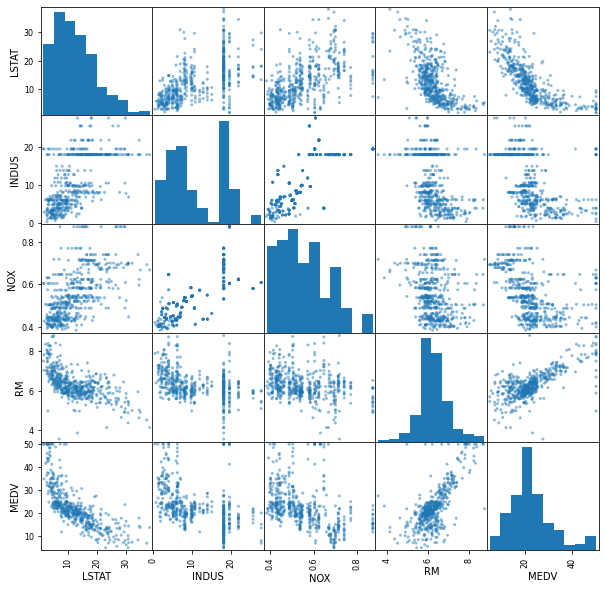

In [ ]:
# scatter matrix plot  que se usa para hallar graficas de correlacion entre dos variables
from pandas.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(10, 10))

# ¡Hagamos un análisis usted mismo!
# Observe la asociación entre LSTAT y MEDV

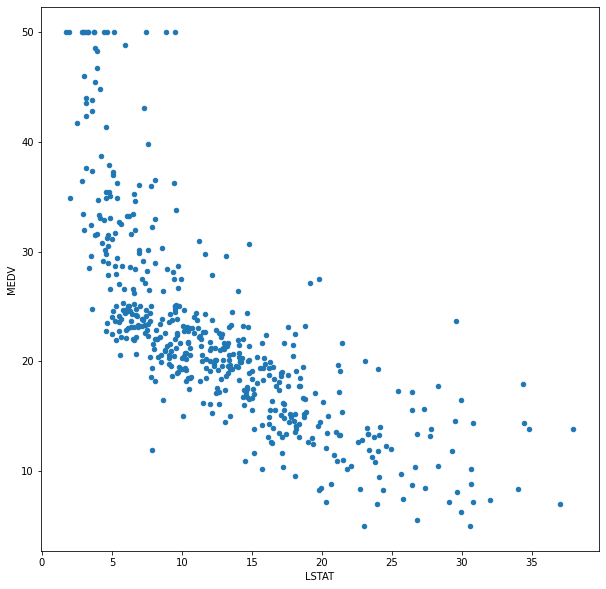

In [ ]:
# This time we take a closer look at MEDV vs LSTAT。 What is the association between MEDV and LSTAT you observed?
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10))

# Simple linear regression model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:

housing = pd.read_csv('/content/housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


# Simple linear regression

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $




Nos basaremos en la asociación entre LSTAT y MEDV y crearemos un modelo de regresión lineal simple. Usemos Python para estimar los valores de B0 y B1 (intersección y pendiente)

In [ ]:
# intentemos adivinar cuáles son los valores reales de intersección y pendiente
# llamamos a nuestra suposición b0, b1 ...
# Intente asignar el valor de b0, b1 para obtener una línea recta que pueda describir nuestros datos
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['RM']

housing.head()

,LSTAT,INDUS,NOX,RM,MEDV,GuessResponse
0,4.98,2.31,0.538,6.575,24.0,6.675
1,9.14,7.07,0.469,6.421,21.6,6.521
2,4.03,7.07,0.469,7.185,34.7,7.285
3,2.94,2.18,0.458,6.998,33.4,7.098
4,5.33,2.18,0.458,7.147,36.2,7.247


In [ ]:
# También quiero saber el error de adivinar ...
# Esto muestra qué tan lejos está nuestra respuesta de conjetura de la respuesta verdadera
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV,GuessResponse,observederror
0,4.98,2.31,0.538,6.575,24.0,6.675,17.325
1,9.14,7.07,0.469,6.421,21.6,6.521,15.079
2,4.03,7.07,0.469,7.185,34.7,7.285,27.415
3,2.94,2.18,0.458,6.998,33.4,7.098,26.302
4,5.33,2.18,0.458,7.147,36.2,7.247,28.953


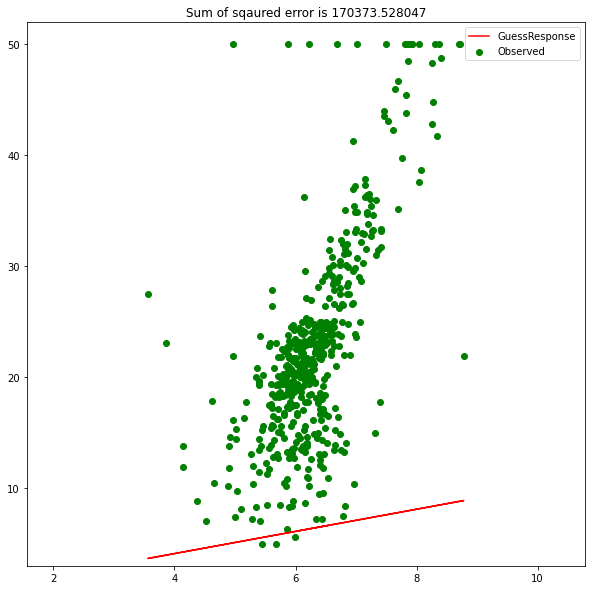

In [ ]:
# traza tu línea estimada junto con los puntos
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

# Estimaciones de mínimos cuadrados

In [ ]:
formula = 'MEDV~LSTAT'
model = smf.ols(formula=formula, data=housing).fit()

# Aquí se estiman la intersección y la pendiente por estimación de mínimos cuadrados
# El atributo 'params' devuelve una lista de parámetros estimados del modelo
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['RM']

# También quiero saber el error de adivinar ...
housing['error'] = housing['MEDV'] - housing['BestResponse']
print(housing['error'])
housing.head()

0      -4.307266
1      -6.853574
2       6.972264
3       5.494604
4       8.436162
         ...    
501    -5.890165
502    -8.139539
503    -4.026297
504    -6.099206
505   -16.925043
Name: error, Length: 506, dtype: float64


,LSTAT,INDUS,NOX,RM,MEDV,GuessResponse,observederror,BestResponse,error
0,4.98,2.31,0.538,6.575,24.0,6.675,17.325,28.307266,-4.307266
1,9.14,7.07,0.469,6.421,21.6,6.521,15.079,28.453574,-6.853574
2,4.03,7.07,0.469,7.185,34.7,7.285,27.415,27.727736,6.972264
3,2.94,2.18,0.458,6.998,33.4,7.098,26.302,27.905396,5.494604
4,5.33,2.18,0.458,7.147,36.2,7.247,28.953,27.763838,8.436162


# Least sqaure estimates

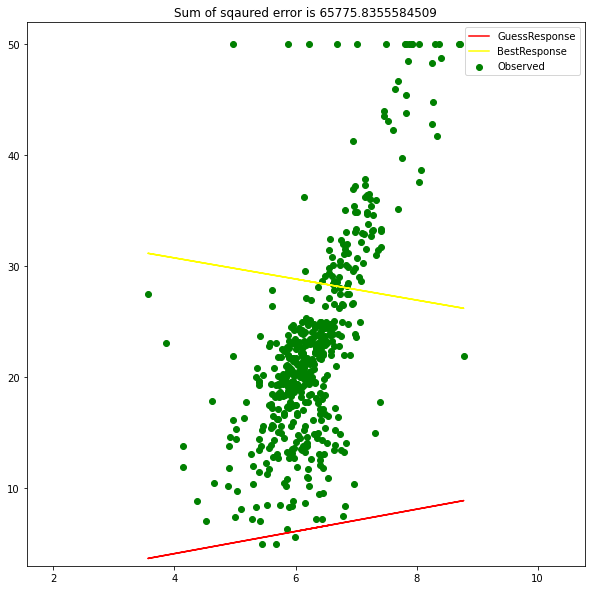

In [ ]:
# traza tu línea estimada junto con los puntos
plt.figure(figsize=(10, 10))
# Vea si el error cae después de usar el método de mínimos cuadrados
plt.title('Sum of sqaured error is {}'.format((((housing['error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

# Summary table

In [ ]:
# Consulte el valor P de RM, el intervalo de confianza y el cuadrado R para evaluar el rendimiento.
print(model.summary()) #  crea un modelo re resumen

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           5.08e-88
Time:                        02:01:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

# **Diagnostic of models**

In [ ]:
housing = pd.read_csv('housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [ ]:
model = smf.ols(formula='MEDV~LSTAT', data=housing).fit()

# Here are estimated intercept and slope by least square estimation 
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['LSTAT']

# **Assumptions behind linear regression model**
Linearity
independence
Normality
Equal Variance


# **Linearity**

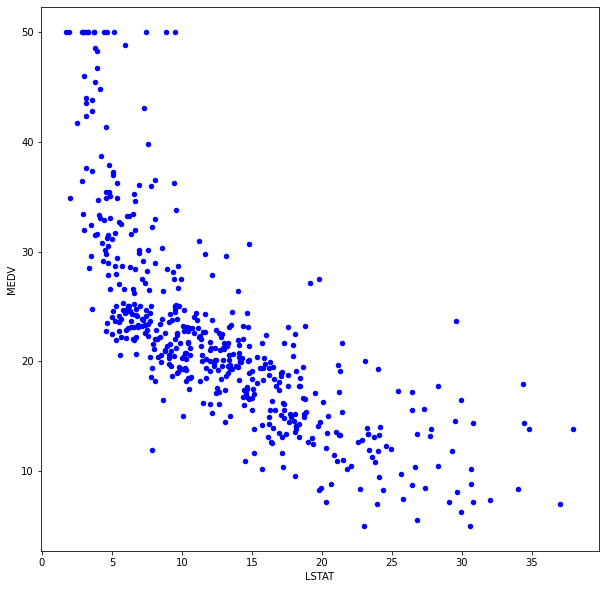

In [ ]:
# puede verificar el diagrama de dispersión para tener una verificación rápida
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10), color='b')

# **Independence**

In [ ]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV,BestResponse,error
0,4.98,2.31,0.538,6.575,24.0,29.822595,-5.822595
1,9.14,7.07,0.469,6.421,21.6,25.870390,-4.270390
2,4.03,7.07,0.469,7.185,34.7,30.725142,3.974858
3,2.94,2.18,0.458,6.998,33.4,31.760696,1.639304
4,5.33,2.18,0.458,7.147,36.2,29.490078,6.709922


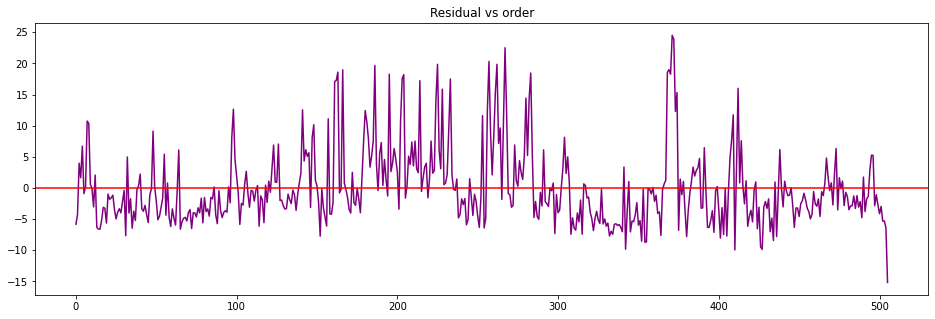

In [ ]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(16, 5))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

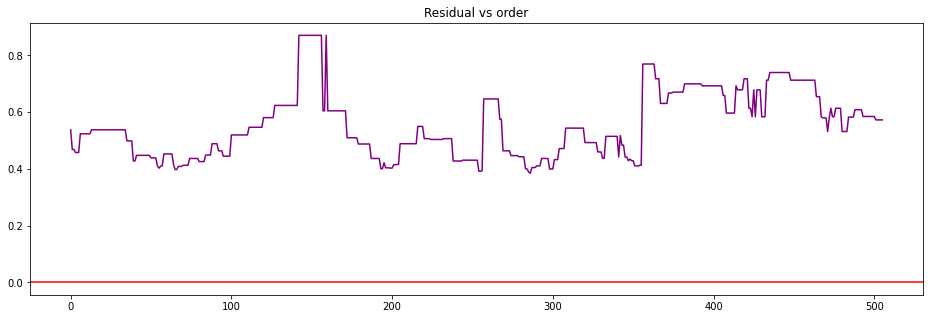

In [ ]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(16, 5))
plt.title('Residual vs order')
plt.plot(housing.index, housing.NOX, color='purple')
plt.axhline(y=0, color='red')
plt.show()

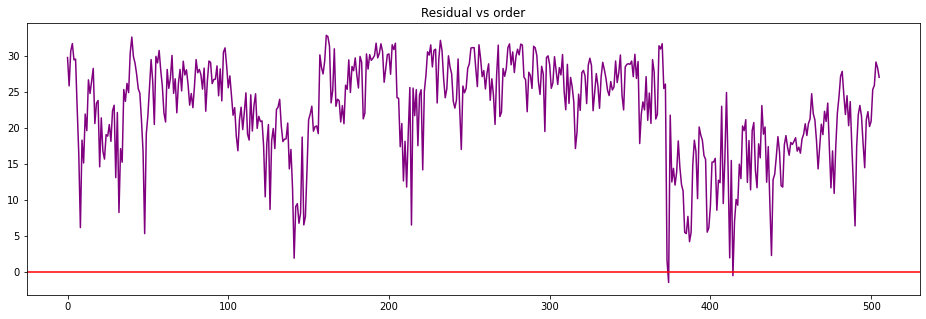

In [ ]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(16, 5))
plt.title('Residual vs order')
plt.plot(housing.index, housing['BestResponse'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [ ]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           5.08e-88
Time:                        02:01:46   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0


# **Normality**

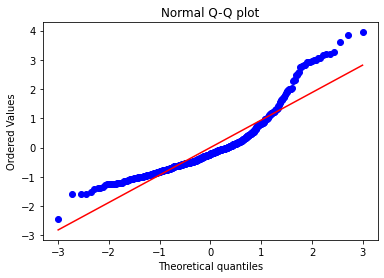

In [ ]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

# **Equal variance**

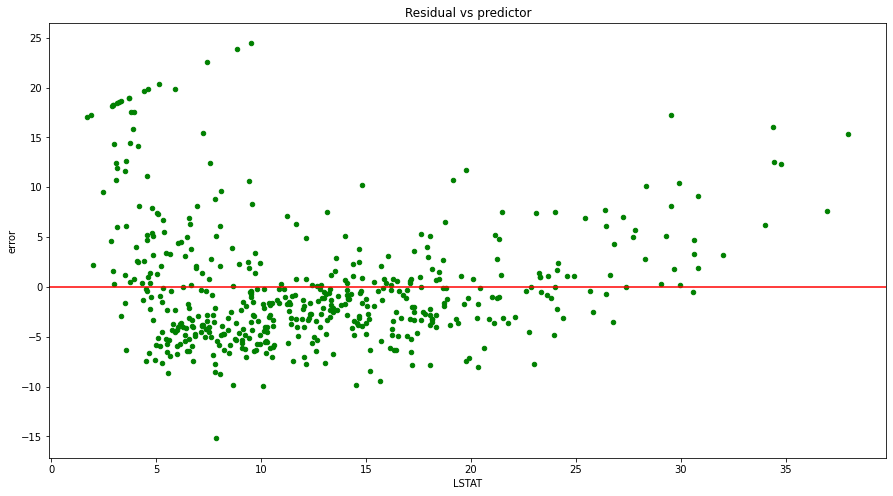

In [ ]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

In [ ]:
#plt.figure(figsize=(10,10))
#plt.scatter(housing['RM'], housing['MEDV'], color='g', label='real')
#plt.scatter(housing['RM'], housing['y'], color='b', label='model')
#plt.plt(housing['RM'], housing['GuessResponse'], color='red')
#plt.plt(housing['RM'], housing['Bestresponse'], color='yellow')
#plt.ylabel('MEDV/$1000')
#plt.xlabel('RM/number')
#plt.xlim(np.min(housing['RM'])-2, np.max(housing['RM'])+2)
#plt.ylim(np.min(housing['MEDV'])-2, np.max(housing['MEDV'])+2)
#plt.legend()
#plt.show()

Podemos ver que el modelo de regresión (MEDV ~ LSTAT) viola los cuatro supuestos. Por lo tanto, no podemos hacer inferencias estadísticas utilizando este modelo.
# Diagnóstico de modelos

In [ ]:
housing = pd.read_csv('/content/housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [ ]:
model = smf.ols(formula='MEDV~LSTAT', data=housing).fit()

# Aquí se estiman la intersección y la pendiente por estimación de mínimos cuadrados 
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['LSTAT']


# **Assumptions behind linear regression model**
Linearity

i0ndependence

Normality

Equal Variance

# **Linearity**

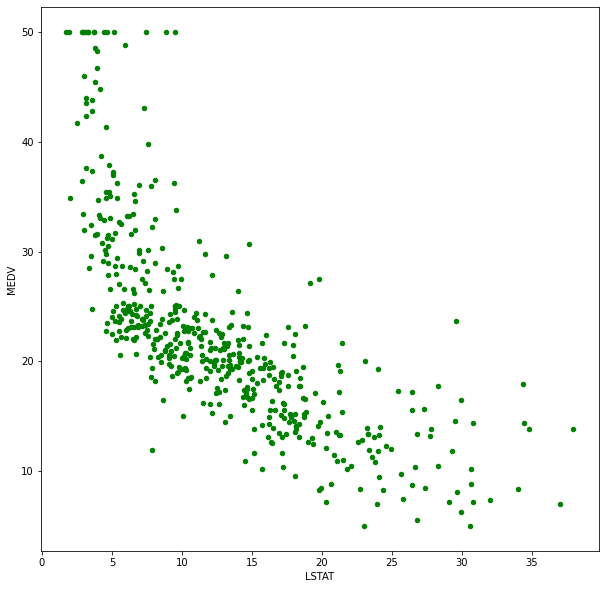

In [ ]:
# you can check the scatter plot to have a fast check
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10), color='g')

# **Independence**

In [ ]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

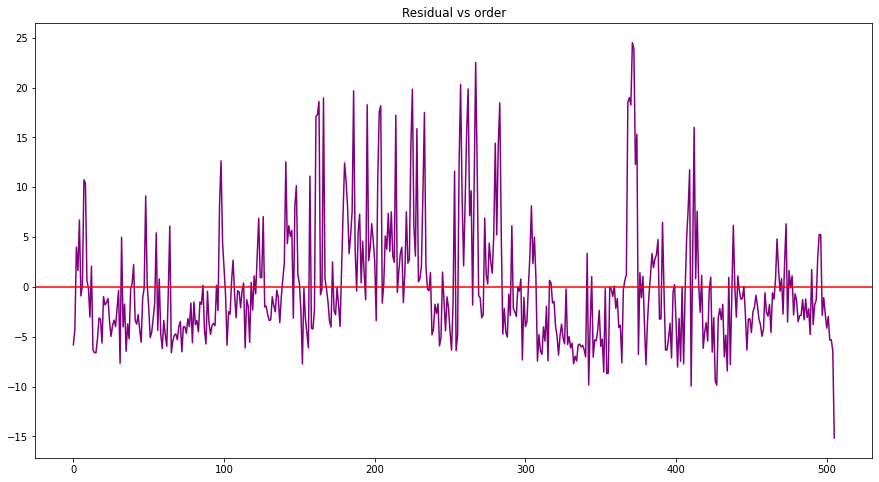

In [ ]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [ ]:
# Método 2: Prueba de Durbin Watson
# Verifique la estadística de Durbin Watson
# Regla empírica: el valor estadístico de prueba en el rango de 1.5 a 2.5 es relativamente normal
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           5.08e-88
Time:                        02:03:51   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0


# **Normality**

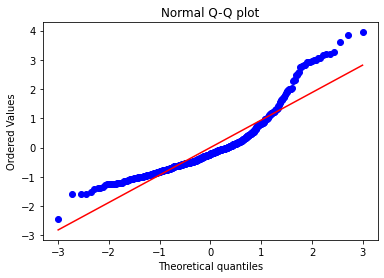

In [ ]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

# **Equal variance**

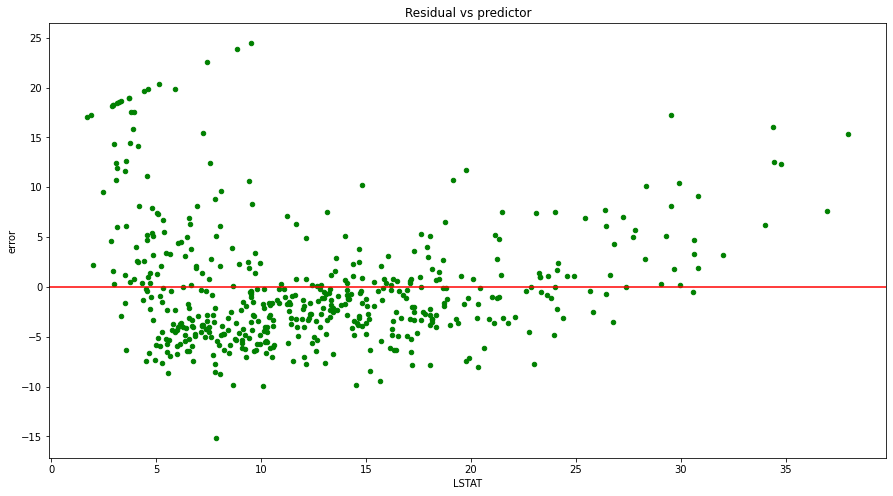

In [ ]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

# Podemos ver que el modelo de regresión (MEDV ~ LSTAT) viola los cuatro supuestos. Por lo tanto, no podemos hacer inferencias estadísticas utilizando este modelo.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
indicepanel = pd.read_csv('indicepanel.csv')
indicepanel.head()

,Date,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
0,2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,-464.320313,143.339996
1,2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2,2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002
3,2008-01-09,0.589997,-2.990006,-25.459961,-63.119873,-230.69043,-17.109864,-5.270020,-12.900390,768.359375,234.450195,139.089996
4,2008-01-10,1.100006,0.589997,16.530029,8.270019,142.90039,9.140137,-40.120117,-100.200196,-195.560547,-158.209961,139.679993


In [ ]:
Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]

In [ ]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()

In [ ]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)


# **Profit of Signal-based strategy**

Beneficio de la estrategia basada en señales

In [ ]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  214.34009500000042


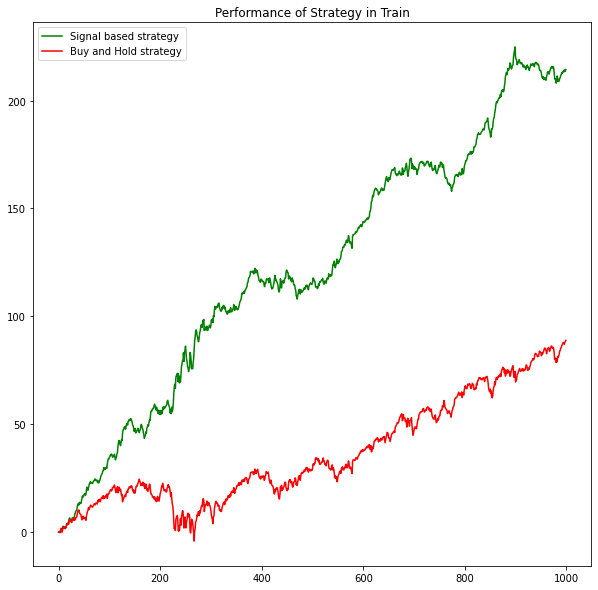

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [ ]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  241.0300879999996


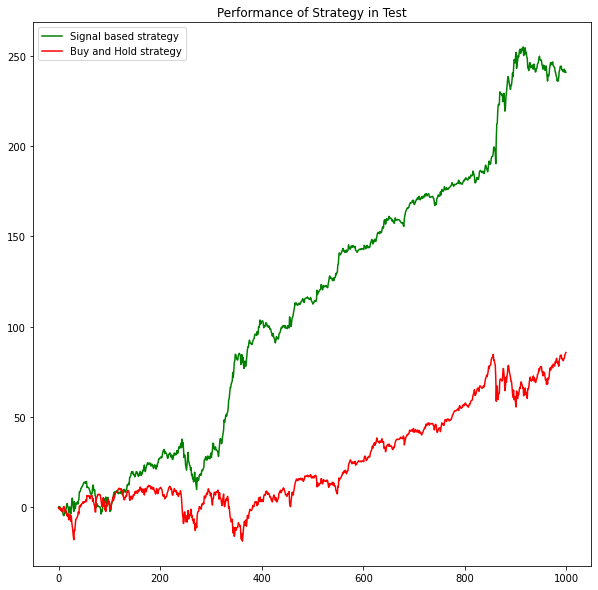

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Test')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

# **Evaluation of model - Practical Standard**

# **Evaluación del modelo - Estándar práctico**
Introducimos dos estándares prácticos comunes: relación de Sharpe, reducción máxima para evaluar el rendimiento de nuestro modelo

In [ ]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [ ]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.179650763032581
Yearly Sharpe Ratio is  2.851867450963232


In [ ]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.13035126208575035
Yearly Sharpe Ratio is  2.0692621353737883


In [ ]:

# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.06069016443644382


In [ ]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.11719899524631659
